# Vectorized Linear Regression
## The model is implemented solely over Numpy and Pandas. No other python libraries are used. 
## The goal is to reduce the Cost function by obtaining the optimal value of parameter thetas, guided by Gradient Descent. 

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loadind the Boston dataset from sklearn.datasets

In [2]:
boston_data = datasets.load_boston()
df = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df['target'] = pd.Series(boston_data.target)                            #Appending the target feature to the dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
df.shape

(506, 14)

506 examples with 13 features and 1 target variable.

In [4]:
Y = df['target']
y = Y.copy(deep=True) 
df.drop('target', axis = 1, inplace = True)

### 506 examples and 13 features.

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Breakdown of each feature :-

crim-
per capita crime rate by town.

zn-
proportion of residential land zoned for lots over 25,000 sq.ft.

indus-
proportion of non-retail business acres per town.

chas-
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox-
nitrogen oxides concentration (parts per 10 million).

rm-
average number of rooms per dwelling.

age-
proportion of owner-occupied units built prior to 1940.

dis-
weighted mean of distances to five Boston employment centres.

rad-
index of accessibility to radial highways.

tax-
full-value property-tax rate per $10,000.

ptratio-
pupil-teacher ratio by town.

black-
1000(Bk - 0.63)^2 where Bk is the proportion of african-american by town.

lstat-
lower status of the population (percent).

target-
median value of owner-occupied homes in $1000s.

### Since features have varying distribution we'll have to normalise them to make sure one feature does not dominate other features on deciding the target value.
### Z-Score or mean normalisation equates the mean of feature to 0 and standard deviation to 1.

In [6]:
#Feature Scaling
#Unscaled features results in dominance of a particular feature/features having higher "weight" 
#and thus reduces the accuracy of the model on data the model is not tested on.
#Performing mean normalisation(Z-Score)
for i in df.columns:
    if i == 'CHAS':
        #We dont normalise a categorical data(chas only has binary values)
        continue
    df[i] = (df[i]-(df[i].mean()))/(df[i].std())

In [7]:
#Dataset with normalised values
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419367,0.284548,-1.286636,0.0,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499
1,-0.416927,-0.487240,-0.592794,0.0,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953
2,-0.416929,-0.487240,-0.592794,0.0,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532
3,-0.416338,-0.487240,-1.305586,0.0,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171
4,-0.412074,-0.487240,-1.305586,0.0,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487


### Converting datasets into matrices to execute vectorised Linear Regression


<AxesSubplot:>

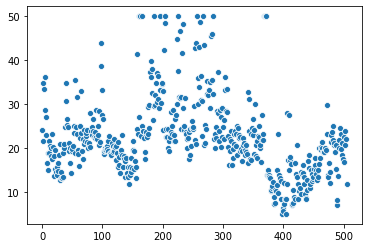

In [8]:
sns.scatterplot(data = y)

## The above plot shows how the price for houses are capped at 50,000. This can prove to limit the accuracy of our model for houses whose prices are more than 50,000, both on real life and training example. This capping of the highest price is one limitation of the Boston Dataset. 

### Converting datasets into numpy array to implement vectorized Linear Regression model

In [9]:
x = df.to_numpy()
print(x.shape, y.shape)
target = y.to_numpy()
numExamples = x.shape[0]
numFeatures = x.shape[1]

(506, 13) (506,)


In [10]:
x = np.append(np.ones((numExamples,1)),x, axis = 1)   #Adding unit bias
x.shape

(506, 14)

In [11]:
theta = np.zeros((numFeatures + 1,1)) #Initializing theta values as 0.

In [12]:
theta.shape

(14, 1)

In [13]:
iterations = [200,300,400,500,700,600,1000]
alpha = [.001 , .003, .01, .03, .1 ,.3]
for i in iterations:
    for j in alpha:
        for iters in range(i):
                h= x@theta                                            #Hypothesis Function
                target = np.reshape(target, (len(target),1))
                error = h-target
                J = ((error**2).sum())*(1/(2*target.shape[0]))        #Cost Function 
                gradient = (x.T@error)*(j/target.shape[0])            #Gradient
                theta = theta-gradient                                #simultaneously updating theta
        print("for",i,"interations and alpha =",j, "cost is",J.sum())
        theta = np.zeros((numFeatures + 1,1))                         #Resetting the values of theta to zeros

for 200 interations and alpha = 0.001 cost is 192.73649086192725
for 200 interations and alpha = 0.003 cost is 92.16585979479567
for 200 interations and alpha = 0.01 cost is 16.56736031993421
for 200 interations and alpha = 0.03 cost is 11.26670020910061
for 200 interations and alpha = 0.1 cost is 10.975819008827813
for 200 interations and alpha = 0.3 cost is 10.947562260267166
for 300 interations and alpha = 0.001 cost is 158.93364527049604
for 300 interations and alpha = 0.003 cost is 55.70813498279195
for 300 interations and alpha = 0.01 cost is 12.249798658233015
for 300 interations and alpha = 0.03 cost is 11.115417442119988
for 300 interations and alpha = 0.1 cost is 10.954637424812594
for 300 interations and alpha = 0.3 cost is 10.947419408162622
for 400 interations and alpha = 0.001 cost is 131.8368859802573
for 400 interations and alpha = 0.003 cost is 35.814111213659196
for 400 interations and alpha = 0.01 cost is 11.548132398806793
for 400 interations and alpha = 0.03 cost i

Text(0.5, 1.0, 'Cost function constantly decreases with increase in number of iterations')

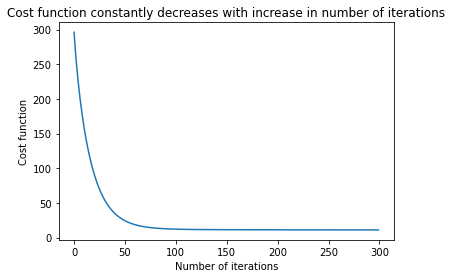

In [26]:
#Choosing the optimal combination of number of iterations and alpha. (300,.03)
theta = np.zeros((numFeatures + 1,1))
iterations = 300
alpha = 0.03
J_History = np.zeros((iterations, 1))
theta_history = np.zeros((iterations,len(theta)))
for i in range(iterations):
    h= x@theta                                                    #Hypothesis Function
    target = np.reshape(target, (len(target),1)) 
    error = h-target
    J = ((error**2).sum())*(1/(2*target.shape[0]))                #Cost Function
    gradient = (x.T@error)*(alpha/target.shape[0])                #Gradient
    theta = theta-gradient
    J_History[i] = J.sum()                                        #Appending values of Cost Function to the array
plt.plot(range(iterations), J_History)
plt.xlabel('Number of iterations')
plt.ylabel('Cost function')
plt.title('Cost function constantly decreases with increase in number of iterations')

In [28]:
theta #Final values of theta obtained by our vectorized liner regression madel

array([[22.37196985],
       [-0.77477326],
       [ 0.78066881],
       [-0.2662464 ],
       [ 2.33052963],
       [-1.48835779],
       [ 2.93465105],
       [-0.10195416],
       [-2.67370346],
       [ 1.40394407],
       [-0.85560594],
       [-1.95959923],
       [ 0.88845309],
       [-3.64414388]])

## New set of values for the 13 features can be multiplied by theta to predict the price of the house corresponding to the values of the 13 features. 